## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd # 판다스 임포트

# 데이터 경로

train = pd.read_csv('/content/b_train.csv') # 훈련 데이터
test = pd.read_csv('/content/b_test.csv')   # 테스트 데이터
submission = pd.read_csv('/content/sampleSubmission.csv') # 제출 샘플 데이터

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [8]:
# datetime 컬럼을 datetime로 형변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 분,초를 제외하고 연도, 월, 일, 시까지 잘라서 새로운 컬럼으로 넣기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [9]:
# test도 train과 동일하게 적용
test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [10]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [12]:
import calendar
from datetime import datetime

In [13]:
# 날짜별 요일 계산하기
# Create a new 'date' column that combines 'year', 'month', and 'day'
train['date'] = pd.to_datetime(train[['year', 'month', 'day']])

# Create a new 'weekday' column
train['weekday'] = train['date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Drop the 'date' column as it's no longer needed
train = train.drop('date', axis=1)

# Check the first few rows of the dataframe to confirm the changes
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [14]:
# test도 동일하게 적용
# Create a new 'date' column that combines 'year', 'month', and 'day'
test['date'] = pd.to_datetime(test[['year', 'month', 'day']])

# Create a new 'weekday' column
test['weekday'] = test['date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Drop the 'date' column as it's no longer needed
test = test.drop('date', axis=1)

# Check the first few rows of the dataframe to confirm the changes
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,Thursday


In [15]:
# Drop the 'datetime' column
train = train.drop('datetime', axis=1)

# Check the first few rows of the dataframe to confirm the changes
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [16]:
# Drop the 'datetime' column
test = test.drop('datetime', axis=1)

# Check the first few rows of the dataframe to confirm the changes
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,Thursday
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,Thursday
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,Thursday
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,Thursday
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,Thursday


# 데이터 EDA

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='year', ylabel='count'>

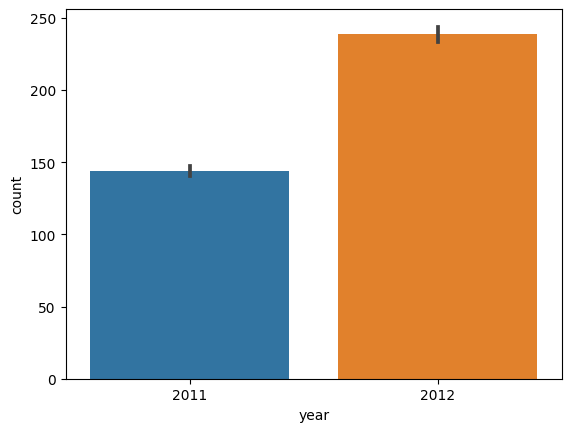

In [18]:
# 연도별 count
sns.barplot(data = train, x = 'year', y = 'count')

<Axes: xlabel='month', ylabel='count'>

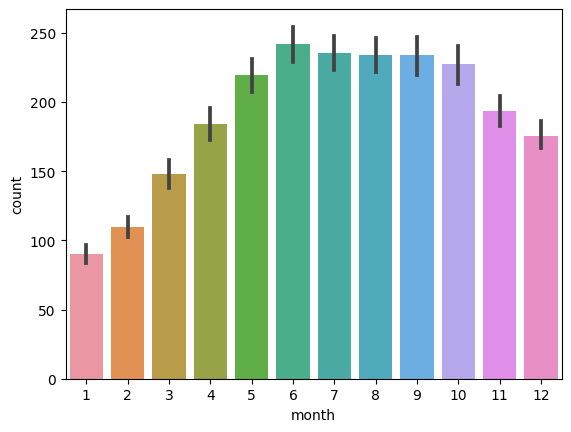

In [19]:
# 월별 count
sns.barplot(data = train, x = 'month', y = 'count')

<Axes: xlabel='day', ylabel='count'>

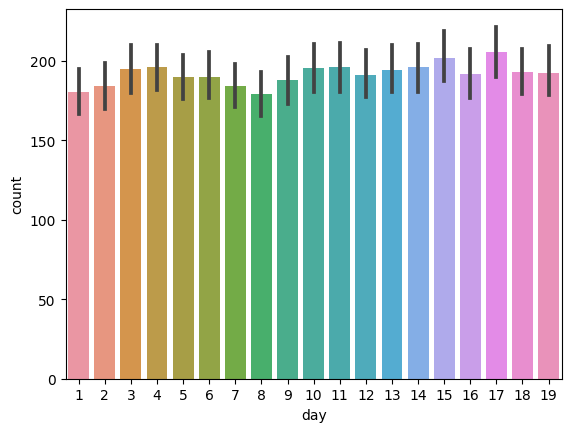

In [20]:
# 일별 count
sns.barplot(data = train, x = 'day', y = 'count')

<Axes: xlabel='hour', ylabel='count'>

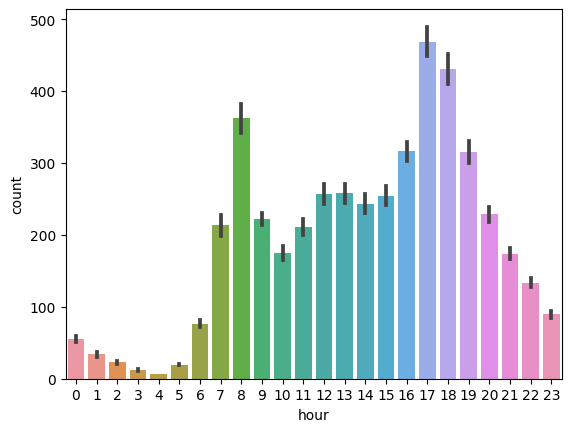

In [21]:
# 시간별 count
sns.barplot(data = train, x = 'hour', y = 'count')

<Axes: xlabel='weekday', ylabel='count'>

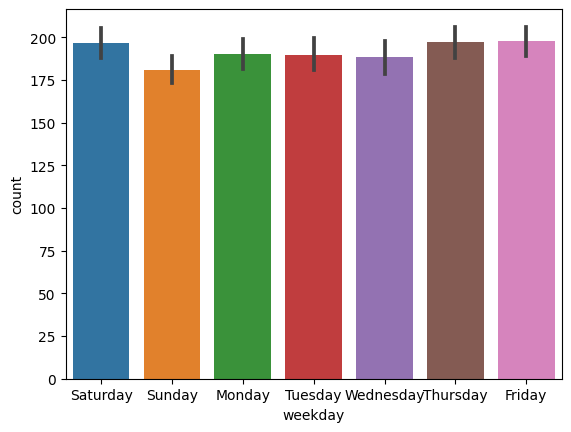

In [22]:
# 요일별 count
sns.barplot(data = train, x = 'weekday', y = 'count')

<Axes: xlabel='season', ylabel='count'>

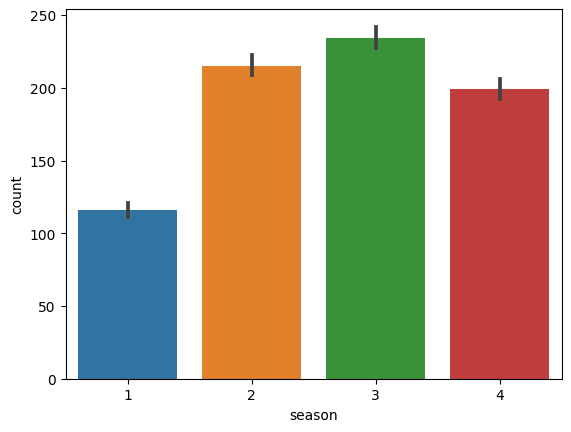

In [23]:
# 계절별 count
sns.barplot(data = train, x = 'season', y = 'count')

<Axes: xlabel='weather', ylabel='count'>

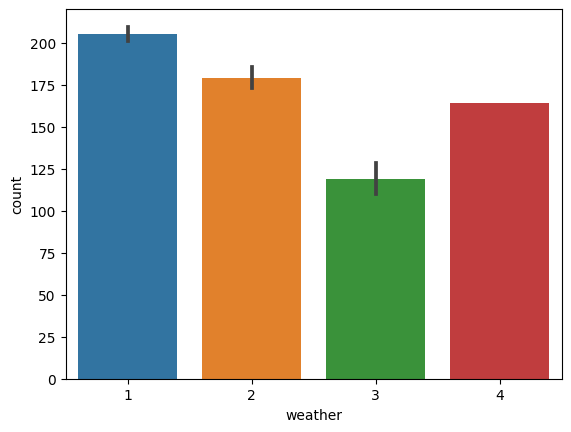

In [24]:
# 날씨별 count
sns.barplot(data = train, x = 'weather', y = 'count')

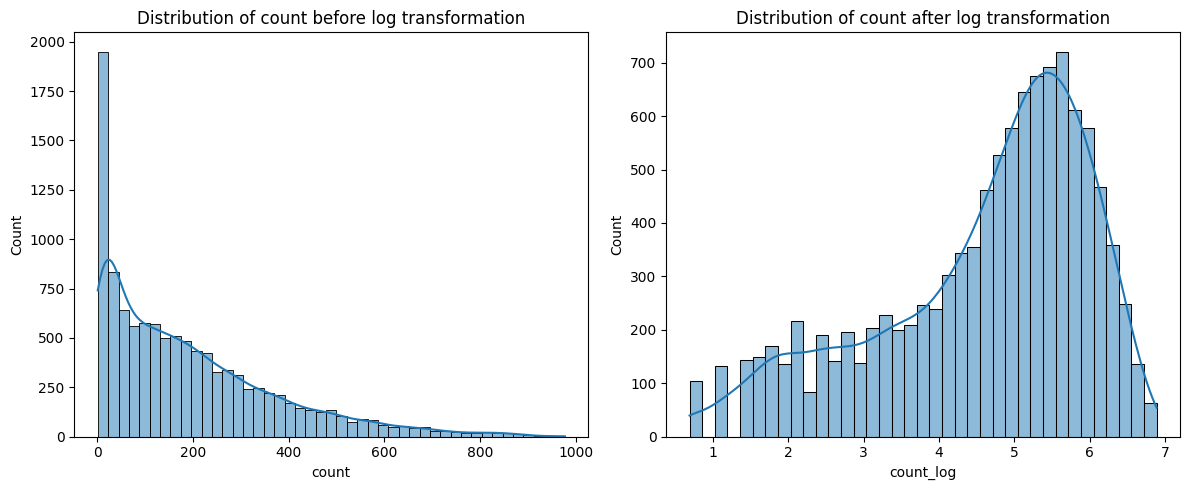

In [25]:
# Plot the distribution of 'count' before the transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train['count'], kde=True)
plt.title('Distribution of count before log transformation')

# Apply the log transformation
train['count_log'] = np.log1p(train['count'])  # log 씌우기 -> 정규화

# Plot the distribution of 'count' after the transformation
plt.subplot(1, 2, 2)
sns.histplot(train['count_log'], kde=True)
plt.title('Distribution of count after log transformation')

plt.tight_layout()
plt.show()

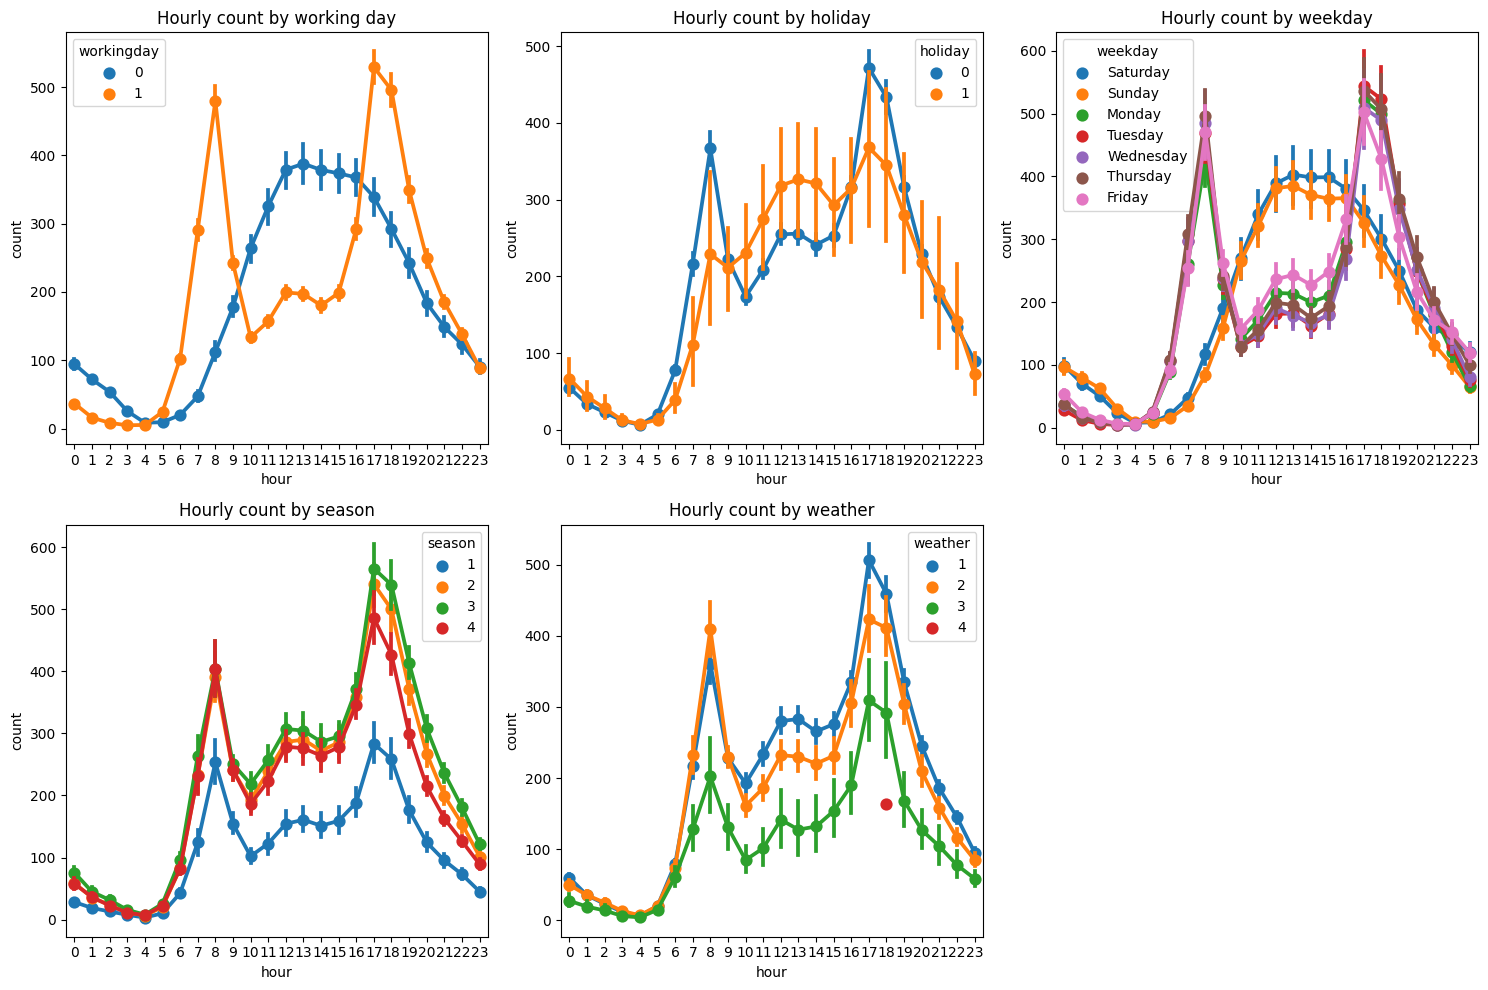

In [26]:
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Create point plots for 'workingday', 'holiday', 'weekday', 'season', 'weather'
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0, 0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[0, 1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[0, 2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[1, 0])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[1, 1])

# Set the titles for the subplots
axes[0, 0].set_title('Hourly count by working day')
axes[0, 1].set_title('Hourly count by holiday')
axes[0, 2].set_title('Hourly count by weekday')
axes[1, 0].set_title('Hourly count by season')
axes[1, 1].set_title('Hourly count by weather')

# Remove the empty subplot
figure.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

In [27]:
# count가 0인 데이터는 없음
train[train['count'] == 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,count_log


In [28]:
# 풍속이 0인 row가 1313개
train[train['windspeed'] == 0.0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,count_log
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday,2.833213
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday,3.713572
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday,3.496508
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday,2.639057
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,Monday,5.451038
10829,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,Monday,5.356586
10846,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,Tuesday,6.496775
10860,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,Tuesday,4.890349


In [29]:
# 임의로 2012년 12월 18일의 풍속을 확인해본 결과, 별다른 이유없이 풍속이 중간중간 0으로 되어있다고 판단
train[(train['year'] == 2012) & (train['month'] == 12) & (train['day'] == 18)]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,count_log
10838,4,0,1,2,18.04,21.970,94,8.9981,0,18,18,2012,12,18,0,Tuesday,2.944439
10839,4,0,1,2,18.04,21.970,94,8.9981,0,15,15,2012,12,18,1,Tuesday,2.772589
10840,4,0,1,2,18.04,21.970,88,15.0013,2,5,7,2012,12,18,2,Tuesday,2.079442
10841,4,0,1,1,17.22,21.210,88,12.9980,0,5,5,2012,12,18,3,Tuesday,1.791759
10842,4,0,1,1,17.22,21.210,82,11.0014,3,5,8,2012,12,18,4,Tuesday,2.197225
10843,4,0,1,1,15.58,19.695,87,6.0032,0,36,36,2012,12,18,5,Tuesday,3.610918
10844,4,0,1,1,14.76,17.425,93,11.0014,1,117,118,2012,12,18,6,Tuesday,4.779123
10845,4,0,1,1,14.76,17.425,93,8.9981,4,351,355,2012,12,18,7,Tuesday,5.874931
10846,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,2012,12,18,8,Tuesday,6.496775
10847,4,0,1,1,16.40,20.455,87,6.0032,19,307,326,2012,12,18,9,Tuesday,5.789960


<Axes: xlabel='windspeed', ylabel='count'>

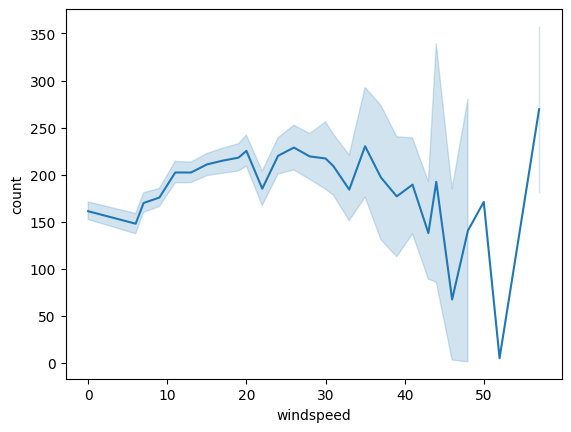

In [30]:
# 풍속별 count
sns.lineplot(data = train, x = 'windspeed', y = 'count')

<Axes: xlabel='count'>

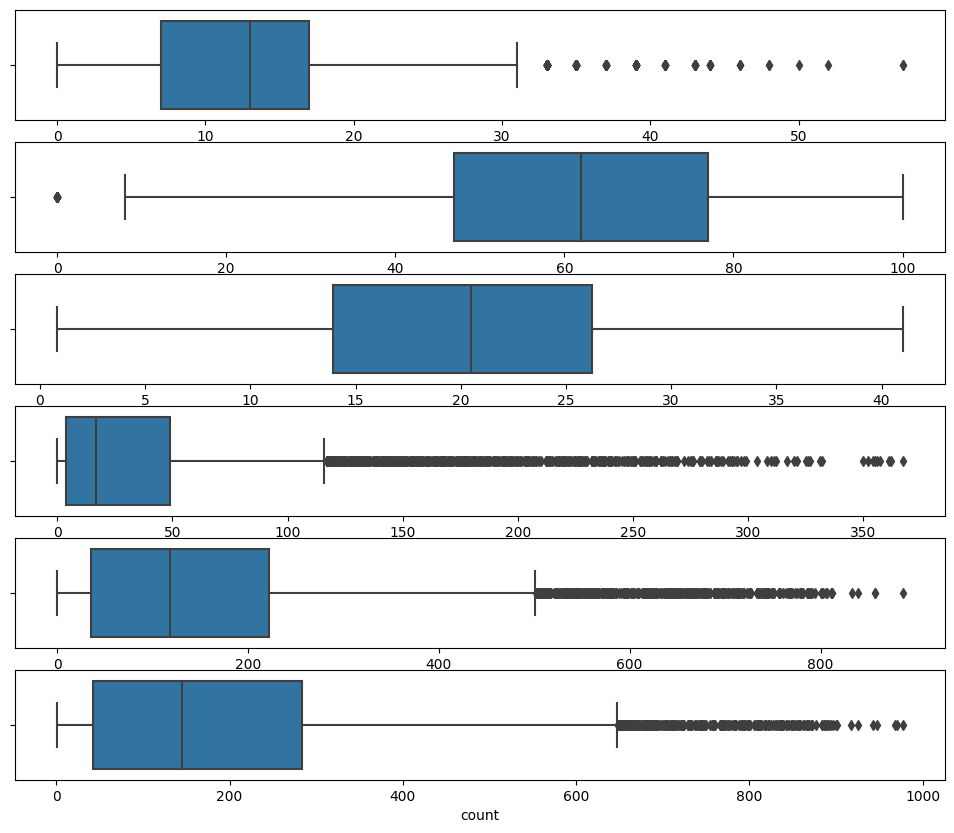

In [31]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (12,10))
sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
sns.boxplot(data = train, x = 'casual', ax = ax4)
sns.boxplot(data = train, x = 'registered', ax = ax5)
sns.boxplot(data = train, x = 'count', ax = ax6)

In [32]:
from collections import Counter
import numpy as np

def detect_outliers(data, n, cols):
    outlier_indices = Counter()
    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
        outlier_indices.update(outlier_list_col)
        multiple_outliers = [k for k, v in outlier_indices.items() if v > n]

    return multiple_outliers

Outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [33]:
train.shape

(10886, 17)

In [34]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)
train.shape

(10846, 17)

In [47]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data.loc[data['windspeed'] == 0]
    windnot0 = data.loc[data['windspeed'] != 0]

    # 풍속이 날씨 변수이기 때문에 날씨 변수를 활용해서 windspeed를 예측해줄 것
    col = ['season', 'weather', 'temp', 'humidity', 'atemp', 'day']
    windnot0['windspeed'] = windnot0['windspeed'].astype('str')

    rf = RandomForestClassifier()
    # windspeed가 0이 아닌 컬럼으로 fit 해줌
    # model.fit(X_train, y_train)
    rf.fit(windnot0[col], windnot0['windspeed'])

    # windspeed가 0인 부분을 예측
    # model.predict(X_test)
    pred_wind0 = rf.predict(X=wind0[col])

    # wind0의 windspeed 값을 pred_wind0으로 바꿔주고
    wind0['windspeed'] = pred_wind0

    # windnot0과 wind0을 합쳐준다
    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')

    data.reset_index(inplace=True)
    data.drop("index", inplace=True, axis=1)

    return data


In [48]:
train = predict_windspeed(train)
test = predict_windspeed(test)

<ipython-input-47-0afedcb20def>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnot0['windspeed'] = windnot0['windspeed'].astype('str')
<ipython-input-47-0afedcb20def>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind0['windspeed'] = pred_wind0
<ipython-input-47-0afedcb20def>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = windnot0.append(wind0)
<ipython-input-47-0afedcb20def>:9: SettingWithCopyWarnin

In [49]:
train[train['windspeed'] == 0.0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,count_log


In [50]:
X_train = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                'humidity', 'windspeed','day', 'hour']]
y_train = train['count']

In [51]:
X_test = test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                'humidity', 'windspeed','day', 'hour']]

In [52]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators = 2000
					, learning_rate = 0.05
                                    , max_depth = 5
                                    , min_samples_leaf = 15
                                    , min_samples_split = 10
                                    , random_state = 42)

#model.fit(x, y)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

In [69]:
pred = regressor.predict(X_test)

In [71]:
submission = pd.DataFrame()
submission['datetime'] = test_datetime
submission['count_log'] = pred

NameError: ignored

In [63]:
# GBM
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# GBM 모델 생성 및 학습
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, log_y)

# 테스트 데이터로 예측
y_pred = gbm.predict(X_train)

# 예측 결과 평가 (MSE를 사용한 예시)
mse = mean_squared_error(X_test, y_pred)
print(f"Mean Squared Error: {mse}")

ValueError: ignored

In [61]:
# Lasso
from sklearn.linear_model import Lasso

Lasso = Lasso()
log_y = np.log(y_train)  # 타깃값 로그변환
Lasso.fit(X_train, log_y) # 모델 훈련

coef = pd.Series(Lasso.coef_, index = X_train.columns)
coef_sort = coef.sort_values(ascending = False)

preds = Lasso.predict(X_train)

print (f'Lasso의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

linearreg_preds = Lasso.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)    # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장

Lasso의 RMSLE 값 : 1.0685


In [53]:
# LinearRegression

from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

log_y = np.log(y_train)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

coef = pd.Series(linear_reg_model.coef_, index = X_train.columns)
coef_sort = coef.sort_values(ascending = False)

# 변수 중요도
sns.barplot(x=coef_sort.values, y=coef_sort.index)

preds = linear_reg_model.predict(X_train)

print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)    # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장